In [1]:
import pandas as pd

In [2]:
#Reading all the csv files
df1 = pd.read_csv("D:\github_repo\Project7\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df2 = pd.read_csv("D:\github_repo\Project7\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df3 = pd.read_csv("D:\github_repo\Project7\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("D:\github_repo\Project7\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("D:\github_repo\Project7\ResaleFlatPricesBasedonApprovalDate19901999.csv")

In [60]:
#Checking the head
print(df1.head)
print(df2.head)
print(df3.head)
print(df4.head)
print(df5.head)

<bound method NDFrame.head of           month        town  flat_type block       street_name storey_range  \
0       2000-01  ANG MO KIO     3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1       2000-01  ANG MO KIO     3 ROOM   174  ANG MO KIO AVE 4     04 TO 06   
2       2000-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     07 TO 09   
3       2000-01  ANG MO KIO     3 ROOM   215  ANG MO KIO AVE 1     07 TO 09   
4       2000-01  ANG MO KIO     3 ROOM   218  ANG MO KIO AVE 1     07 TO 09   
...         ...         ...        ...   ...               ...          ...   
369646  2012-02      YISHUN     5 ROOM   212      YISHUN ST 21     10 TO 12   
369647  2012-02      YISHUN     5 ROOM   758      YISHUN ST 72     01 TO 03   
369648  2012-02      YISHUN     5 ROOM   873      YISHUN ST 81     01 TO 03   
369649  2012-02      YISHUN  EXECUTIVE   664      YISHUN AVE 4     07 TO 09   
369650  2012-02      YISHUN  EXECUTIVE   293      YISHUN ST 22     04 TO 06   

        floor_area_sq

In [5]:
#Merging all the dataframes
df = pd.concat([df1, df2, df3, df4, df5])

In [6]:
#Checking Columns and head
print(df.head(5))

     month        town flat_type block       street_name storey_range  \
0  2000-01  ANG MO KIO    3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1  2000-01  ANG MO KIO    3 ROOM   174  ANG MO KIO AVE 4     04 TO 06   
2  2000-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     07 TO 09   
3  2000-01  ANG MO KIO    3 ROOM   215  ANG MO KIO AVE 1     07 TO 09   
4  2000-01  ANG MO KIO    3 ROOM   218  ANG MO KIO AVE 1     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0            69.0        Improved                 1986      147000.0   
1            61.0        Improved                 1986      144000.0   
2            73.0  New Generation                 1976      159000.0   
3            73.0  New Generation                 1976      167000.0   
4            67.0  New Generation                 1976      163000.0   

  remaining_lease  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  


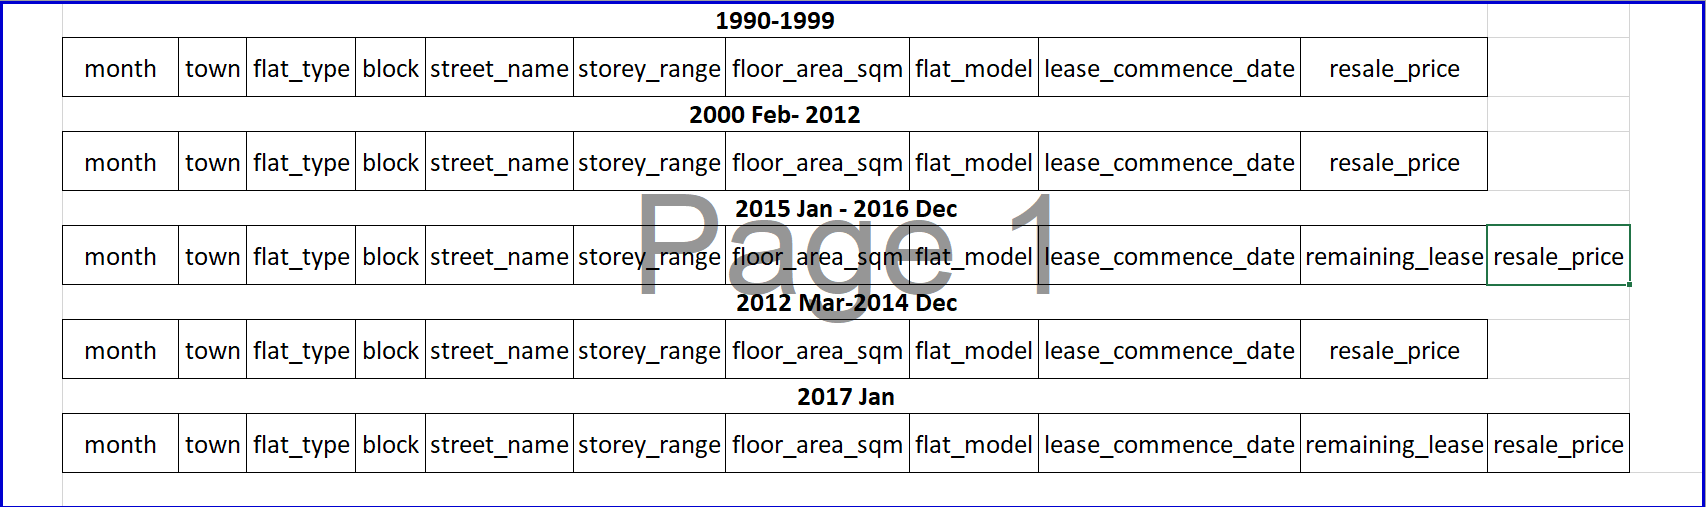

In [7]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914681 entries, 0 to 287195
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914681 non-null  object 
 1   town                 914681 non-null  object 
 2   flat_type            914681 non-null  object 
 3   block                914681 non-null  object 
 4   street_name          914681 non-null  object 
 5   storey_range         914681 non-null  object 
 6   floor_area_sqm       914681 non-null  float64
 7   flat_model           914681 non-null  object 
 8   lease_commence_date  914681 non-null  int64  
 9   resale_price         914681 non-null  float64
 10  remaining_lease      205631 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 83.7+ MB


About the Data type in the table above:
* Date: month, year
* Numeric: block, floor_area_sqm, lease_commence_date, remaining_lease, resale_price
* Categorical: town, flat_type, storey_range, flat_model, street_name, block
* Columns to be converted to numeric: month, year, town, flat_type, block, storey_range, flat_model, street_name

In [69]:
#Removing the alphanumeric characters from the block column
# Converting the block column to int
df['block'] = df['block'].astype(str)
df['block'] = df['block'].apply(lambda x: ''.join(char for char in x if char in '0123456789'))
# Now df['block'] should contain only digits in each element
df['block'] = df['block'].astype(int)

In [70]:
#converting the month column to year and month
df['month'] = pd.to_datetime(df['month'])
#Convert month to year and month
df['year'] = df['month'].apply(lambda i : i.year)
df['month'] = df['month'].apply(lambda i : i.month)

In [66]:
#Summarizing the data   
df.describe()

,month,block,floor_area_sqm,lease_commence_date,resale_price,year
count,914681.000000,914681.000000,914681.000000,914681.000000,9.146810e+05,914681.000000
mean,6.591986,348.359056,95.697147,1988.139603,3.170377e+05,2005.925992
std,3.405788,255.123445,25.849534,10.522351,1.672348e+05,9.148191
min,1.000000,1.000000,28.000000,1966.000000,5.000000e+03,1990.000000
25%,4.000000,127.000000,73.000000,1981.000000,1.910000e+05,1998.000000
50%,7.000000,302.000000,93.000000,1986.000000,2.950000e+05,2005.000000
75%,10.000000,534.000000,113.000000,1996.000000,4.120000e+05,2013.000000
max,12.000000,999.000000,307.000000,2022.000000,1.500000e+06,2023.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914681 entries, 0 to 287195
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914681 non-null  int64  
 1   town                 914681 non-null  object 
 2   flat_type            914681 non-null  object 
 3   block                914681 non-null  int32  
 4   street_name          914681 non-null  object 
 5   storey_range         914681 non-null  object 
 6   floor_area_sqm       914681 non-null  float64
 7   flat_model           914681 non-null  object 
 8   lease_commence_date  914681 non-null  int64  
 9   resale_price         914681 non-null  float64
 10  remaining_lease      205631 non-null  object 
 11  year                 914681 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 87.2+ MB


In [10]:
#Checking for null values
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
dtype: int64

In [11]:
#fill the null values suing ML models
df = df.fillna(0)

In [12]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
dtype: int64

In [13]:
#saving the data
#df.to_csv('ResaleFlatPrices.csv', index=False)

In [14]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,0,2000
1,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,0,2000
2,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,0,2000
3,1,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,0,2000
4,1,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,0,2000


Exploratory Data Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17312\4230611447.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['block'])


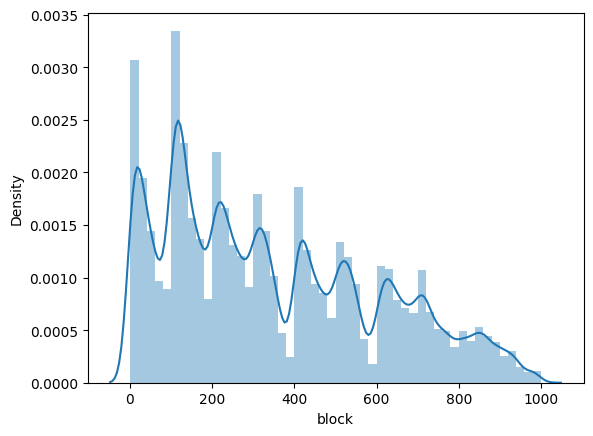

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17312\4230611447.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['floor_area_sqm'])


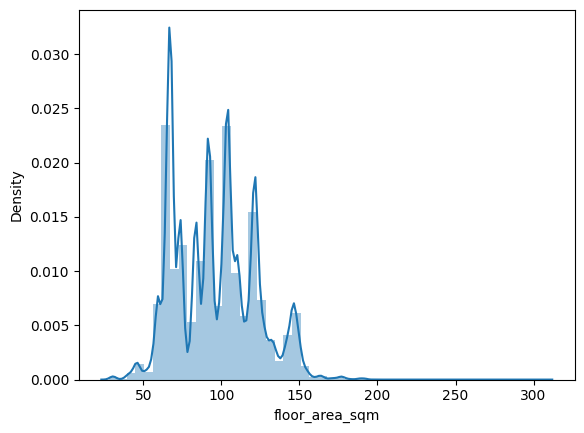

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17312\4230611447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lease_commence_date'])


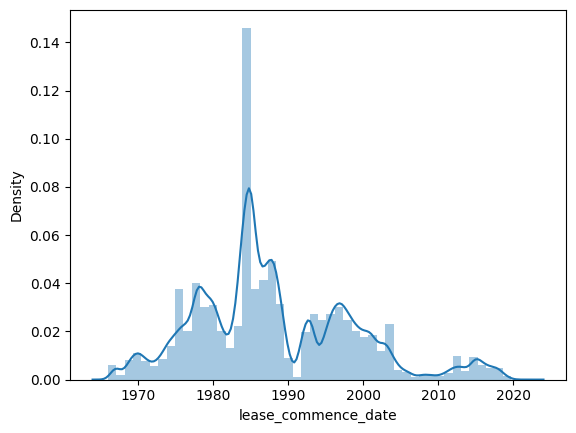

In [14]:
#Checking Distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['block'])
plt.show()
sns.distplot(df['floor_area_sqm'])
plt.show()
sns.distplot(df['lease_commence_date'])
plt.show()

The distribution of the block, floor_area_sqm and lease_commence_date are right skewed.

In [8]:
#replacing MULTI-GENERATION with MULTI GENERATION
df['flat_type'] = df['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')
df['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM',
       'MULTI GENERATION', '1 ROOM'], dtype=object)

          flat_type  flat_model
0            1 ROOM           2
1            2 ROOM           9
2            3 ROOM          15
3            4 ROOM          18
4            5 ROOM          17
5         EXECUTIVE           8
6  MULTI GENERATION           2


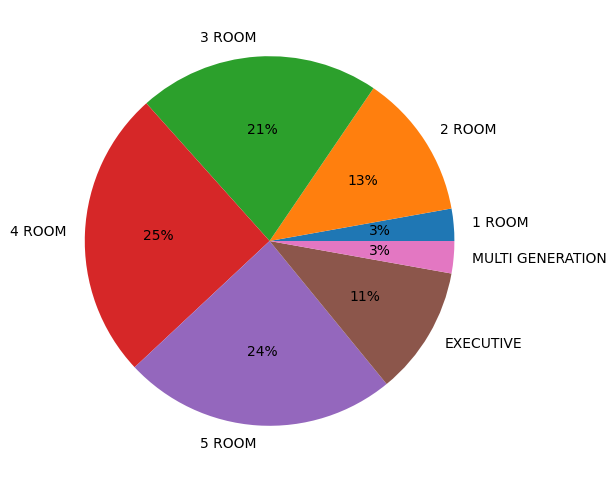

In [10]:
#Checking flat type with respect to flat model
import matplotlib.pyplot as plt
temp = pd.DataFrame(df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (12,6))
plt.pie(temp['flat_model'], labels = temp['flat_type'], autopct = '%.0f%%')
plt.show()

#In Floor type with respect to floor model
* 4 Room, 5 Room and 3 ROOM are the most popular flat types folowed by others

<Axes: xlabel='flat_type', ylabel='floor_area_sqm'>

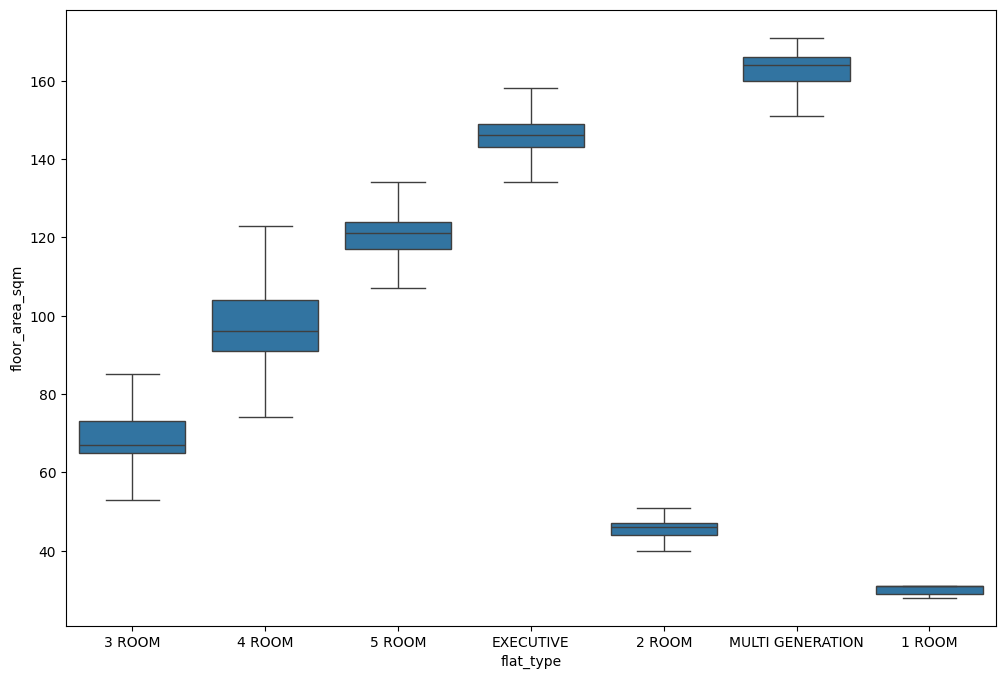

In [12]:
#Checking flat type with respect to floor area
import seaborn as sns
plt.figure(figsize = (12,8))
sns.boxplot(x = 'flat_type', y ='floor_area_sqm', data = df, showfliers = False)

On the bases of floor area to flat type
*4 room and 3 room are the most popular flat types

<Axes: xlabel='flat_type', ylabel='resale_price'>

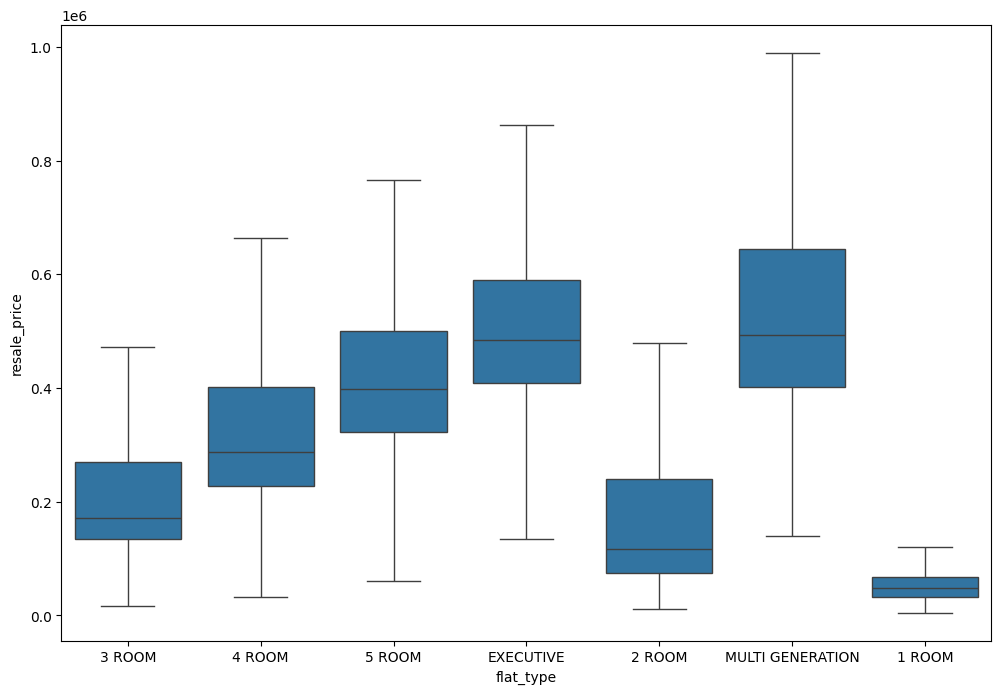

In [13]:
# Distribution of resale_price based on flat_type
plt.figure(figsize = (12,8))
sns.boxplot(x = 'flat_type', y ='resale_price', data = df, showfliers = False)

On the bases of flat type to resale price
* Multi Generation and Executive are the most expensive flat types
* 1 Room and 2 Room are the least expensive flat types

In [20]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year'],
      dtype='object')

In [22]:
#print all the unique values in category column
print(df['month'].unique())
print("---------------------------------------------------------------")
print(df['year'].unique())
print("---------------------------------------------------------------")
print(df['town'].unique())
print("---------------------------------------------------------------")
print(df['flat_type'].unique())
print("---------------------------------------------------------------")
print(df['storey_range'].unique())
print("---------------------------------------------------------------")
print(df['flat_model'].unique())
print("---------------------------------------------------------------")
df['street_name'].unique()

[ 1  2  3  4  5  6  7  8  9 10 11 12]
---------------------------------------------------------------
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2017
 2018 2019 2020 2021 2022 2023 2013 2014 2015 2016 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999]
---------------------------------------------------------------
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH'
 'WOODLANDS' 'YISHUN' 'SEMBAWANG' 'PUNGGOL' 'LIM CHU KANG']
---------------------------------------------------------------
['3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '2 ROOM' 'MULTI-GENERATION'
 '1 ROOM' 'MULTI GENERATION']
---------------------------------------------------------------
['07 TO 09' '04 TO 06' '01 TO 03' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 2

array(['ANG MO KIO AVE 4', 'ANG MO KIO AVE 1', 'ANG MO KIO AVE 10',
       'ANG MO KIO AVE 2', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 5',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 8', 'ANG MO KIO AVE 9',
       'ANG MO KIO ST 21', 'ANG MO KIO ST 31', 'ANG MO KIO ST 11',
       'BEDOK RESERVOIR RD', 'BEDOK NTH RD', 'BEDOK NTH ST 3',
       'BEDOK STH AVE 1', 'BEDOK STH RD', 'CHAI CHEE AVE',
       'NEW UPP CHANGI RD', 'CHAI CHEE DR', 'CHAI CHEE RD',
       'BEDOK NTH AVE 1', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 4', 'BEDOK NTH ST 1', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK STH AVE 2', 'BEDOK STH AVE 3',
       'CHAI CHEE ST', 'LENGKONG TIGA', 'JLN TENAGA', 'SIN MING RD',
       'SHUNFU RD', 'BISHAN ST 11', 'BISHAN ST 12', 'BISHAN ST 13',
       'SIN MING AVE', 'BISHAN ST 22', 'BISHAN ST 23', 'BISHAN ST 24',
       'BRIGHT HILL DR', 'BT BATOK ST 51', 'BT BATOK ST 52',
       'BT BATOK ST 11', 'BT BATOK ST 21', 'BT BATOK ST 34',
       'BT BATOK WEST AVE 4', 

In [15]:
#append unique values in a list for selection of dropdown in streamlit(front end)
a = '''
town = []
for i in range(len(df['town'].unique())):
  town.append(df['town'].unique()[i])
import json
# Save to a JSON file
with open('town.json', 'w') as file:
    json.dump(town, file)

flat_type = []
for i in range(len(df['flat_type'].unique())):
  flat_type.append(df['flat_type'].unique()[i])
with open('flat_type.json', 'w') as file:
    json.dump(flat_type, file)

street_name = []
for i in range(len(df['street_name'].unique())):
  street_name.append(df['street_name'].unique()[i])
with open('street_name.json', 'w') as file:
    json.dump(street_name, file)


storey_range = []
for i in range(len(df['storey_range'].unique())):
  storey_range.append(df['storey_range'].unique()[i])
with open('storey_range.json', 'w') as file:
    json.dump(storey_range, file)

flat_model = []
for i in range(len(df['flat_model'].unique())):
  flat_model.append(df['flat_model'].unique()[i])
with open('flat_model.json', 'w') as file:
    json.dump(flat_model, file) '''

In [180]:
#sum of unique values
df.nunique()

month                    12
town                     27
flat_type                 8
block                   986
street_name             584
storey_range             25
floor_area_sqm          210
flat_model               34
lease_commence_date      56
resale_price           9343
remaining_lease         721
year                     34
dtype: int64

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914681 entries, 0 to 287195
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914681 non-null  int64  
 1   town                 914681 non-null  object 
 2   flat_type            914681 non-null  object 
 3   block                914681 non-null  int32  
 4   street_name          914681 non-null  object 
 5   storey_range         914681 non-null  object 
 6   floor_area_sqm       914681 non-null  float64
 7   flat_model           914681 non-null  object 
 8   lease_commence_date  914681 non-null  int64  
 9   resale_price         914681 non-null  float64
 10  remaining_lease      914681 non-null  object 
 11  year                 914681 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 87.2+ MB


The category column has been converted into numeric using an encoder

In [47]:
#converting the category column into numeric using label encoder
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df['town']= le1.fit_transform(df['town'])
le2 = LabelEncoder()
df['flat_type']= le2.fit_transform(df['flat_type'])
le3 = LabelEncoder()
df['street_name']= le3.fit_transform(df['street_name']) 
le4 = LabelEncoder()
df['storey_range']= le4.fit_transform(df['storey_range'])
le5 = LabelEncoder()
df['flat_model']= le5.fit_transform(df['flat_model'])


In [183]:
#Save all the label encoder in a pickle file
import pickle
#pickle.dump(le1, open('label_encoder1twn.pkl', 'wb'))
#pickle.dump(le2, open('label_encoder2FT.pkl', 'wb'))
#pickle.dump(le3, open('label_encoder3SN.pkl', 'wb'))
#pickle.dump(le4, open('label_encoder4SR.pkl', 'wb'))
#pickle.dump(le5, open('label_encoder5FM.pkl', 'wb'))

In [184]:
#category_to_check = 'Premium Apartment Loft'

# Transform the chosen category to its encoded value
#encoded_value = le.transform([category_to_check])[0]

##print(f"The encoded value for '{category_to_check}' is: {encoded_value}")

In [185]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,0,2,170,17,4,69.0,9,1986,147000.0,0,2000
1,1,0,2,174,17,2,61.0,9,1986,144000.0,0,2000
2,1,0,2,216,13,4,73.0,21,1976,159000.0,0,2000
3,1,0,2,215,13,4,73.0,21,1976,167000.0,0,2000
4,1,0,2,218,13,4,67.0,21,1976,163000.0,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
287191,12,26,5,611,572,5,142.0,3,1987,456000.0,0,1999
287192,12,26,5,324,561,0,142.0,3,1988,408000.0,0,1999
287193,12,26,5,392,558,4,146.0,11,1988,469000.0,0,1999
287194,12,26,5,356,563,2,146.0,11,1988,440000.0,0,1999


<Axes: >

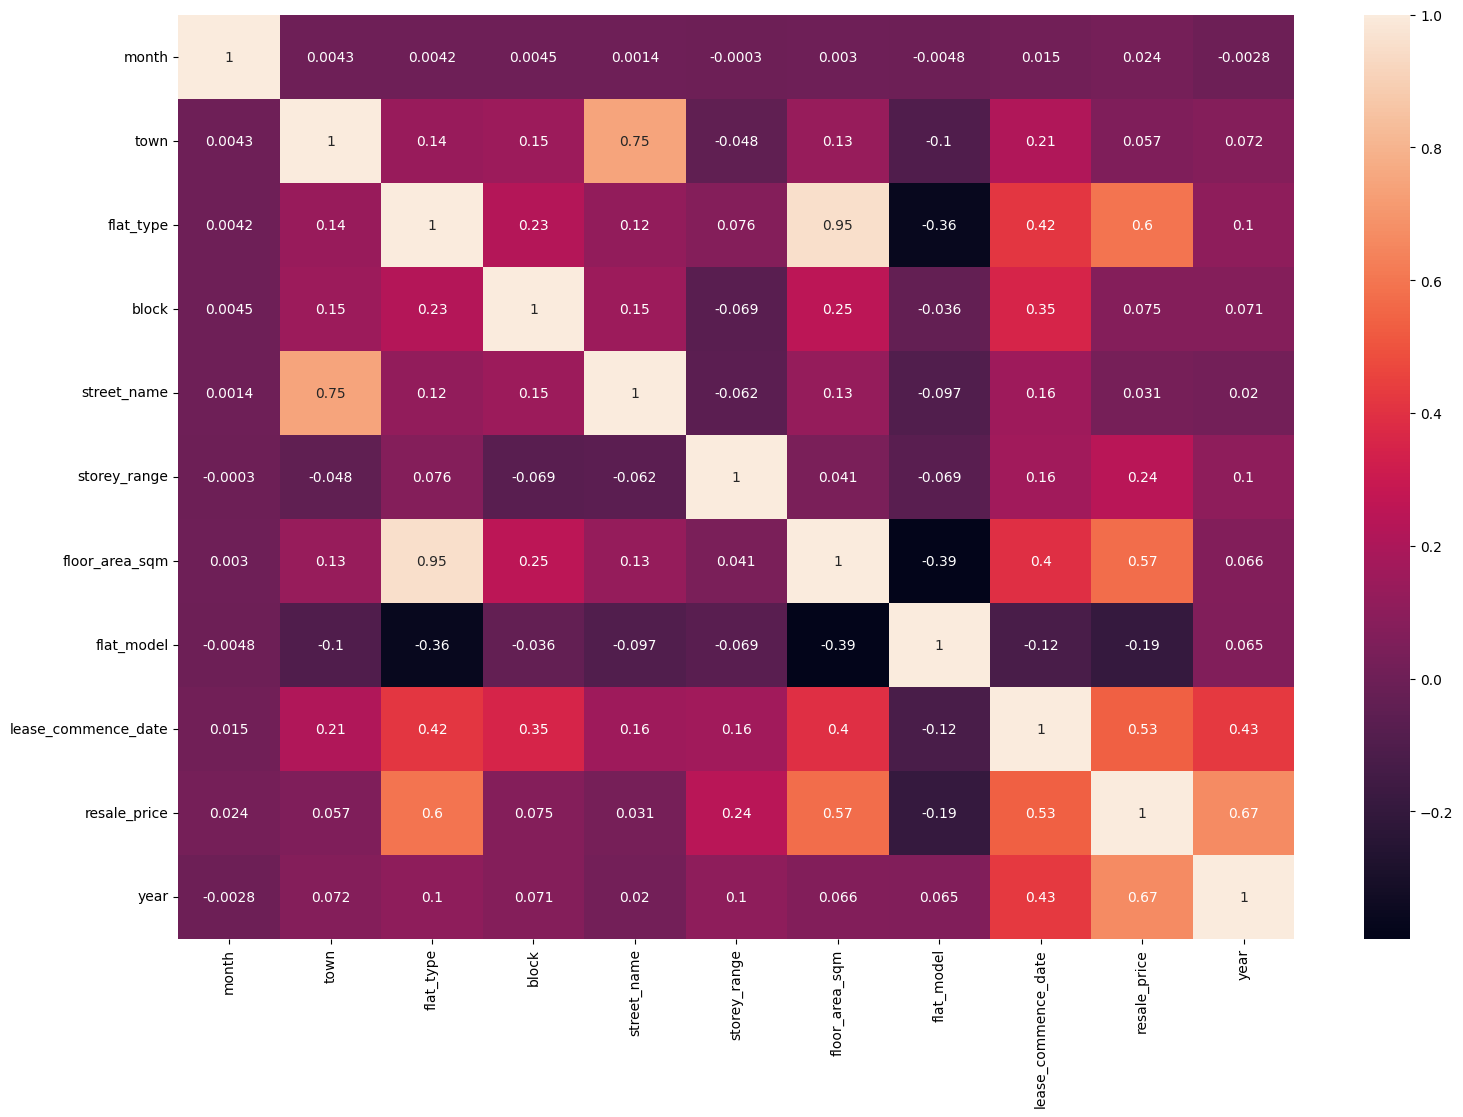

In [25]:
#Correlation
feature_cols = ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price', 'year']
plt.figure(figsize = (18,12))
sns.heatmap(df[feature_cols].corr(), annot = True)

*Informations Obtained From Correlation*
1) Flat type and flat model are highly correlated
2) Town and Street name are highly correlated 
3) Resale price and year are highly correlated
4) Flat type and resale price are highly correlated
5) Floor area and resale price are highly correlated
6) resale_price and flat_type are highly correlated 
7) Town, month, street name and storey range are lessly correlated to resale price

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914681 entries, 0 to 287195
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914681 non-null  int64  
 1   town                 914681 non-null  int32  
 2   flat_type            914681 non-null  int32  
 3   block                914681 non-null  int32  
 4   street_name          914681 non-null  int32  
 5   storey_range         914681 non-null  int32  
 6   floor_area_sqm       914681 non-null  float64
 7   flat_model           914681 non-null  int32  
 8   lease_commence_date  914681 non-null  int64  
 9   resale_price         914681 non-null  float64
 10  remaining_lease      914681 non-null  object 
 11  year                 914681 non-null  int64  
dtypes: float64(2), int32(6), int64(3), object(1)
memory usage: 69.8+ MB


In [187]:
#describe
df.describe()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
count,914681.000000,914681.000000,914681.000000,914681.000000,914681.000000,914681.00000,914681.000000,914681.000000,914681.000000,9.146810e+05,914681.000000
mean,6.591986,13.642394,3.013648,348.359056,285.889734,3.40265,95.697147,15.712793,1988.139603,3.170377e+05,2005.925992
std,3.405788,8.801183,0.949784,255.123445,181.654512,2.65632,25.849534,6.678033,10.522351,1.672348e+05,9.148191
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,28.000000,0.000000,1966.000000,5.000000e+03,1990.000000
25%,4.000000,5.000000,2.000000,127.000000,122.000000,2.00000,73.000000,9.000000,1981.000000,1.910000e+05,1998.000000
50%,7.000000,13.000000,3.000000,302.000000,278.000000,4.00000,93.000000,16.000000,1986.000000,2.950000e+05,2005.000000
75%,10.000000,23.000000,4.000000,534.000000,460.000000,5.00000,113.000000,21.000000,1996.000000,4.120000e+05,2013.000000
max,12.000000,26.000000,7.000000,999.000000,583.000000,24.00000,307.000000,33.000000,2022.000000,1.500000e+06,2023.000000


In [48]:
from sklearn.model_selection import train_test_split

# Assuming 'resale_price' and 'remaining_lease' are columns to be dropped
columns_to_drop = ['resale_price', 'remaining_lease']
# Separate features (X) and target variable (y)
X = df.drop(columns=columns_to_drop)
y = df['resale_price']

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
x_train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year
235758,6,BUKIT BATOK,4 ROOM,383,BT BATOK WEST AVE 5,16 TO 18,92.0,Model A,2005,2007
149988,3,YISHUN,4 ROOM,323,YISHUN CTRL,07 TO 09,108.0,Model A,1988,2023
52515,7,ANG MO KIO,4 ROOM,429,ANG MO KIO AVE 3,04 TO 06,92.0,New Generation,1978,2019
138595,10,TAMPINES,4 ROOM,301,TAMPINES ST 32,07 TO 09,107.0,Model A,1993,2022
119337,5,PASIR RIS,4 ROOM,109,PASIR RIS ST 11,04 TO 06,113.0,Model A,1990,2003
...,...,...,...,...,...,...,...,...,...,...
259178,4,JURONG WEST,4 ROOM,716,JURONG WEST ST 71,10 TO 12,111.0,Model A,1991,2008
365838,12,PUNGGOL,5 ROOM,294,PUNGGOL CTRL,07 TO 09,110.0,Premium Apartment,2003,2011
131932,10,WOODLANDS,5 ROOM,862,WOODLANDS ST 83,07 TO 09,127.0,Improved,1996,2003
43670,4,GEYLANG,3 ROOM,52,SIMS PL,01 TO 03,65.0,IMPROVED,1977,1993


In [192]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731744 entries, 235758 to 121958
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                731744 non-null  int64  
 1   town                 731744 non-null  int32  
 2   flat_type            731744 non-null  int32  
 3   block                731744 non-null  int32  
 4   street_name          731744 non-null  int32  
 5   storey_range         731744 non-null  int32  
 6   floor_area_sqm       731744 non-null  float64
 7   flat_model           731744 non-null  int32  
 8   lease_commence_date  731744 non-null  int64  
 9   year                 731744 non-null  int64  
dtypes: float64(1), int32(6), int64(3)
memory usage: 44.7 MB


In [49]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [50]:
#Predicting the model
y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error: 19276.05687562389
Mean Squared Error: 850482230.818876
R2 Score: 0.9695975643709396


In [195]:
#save the model
#pickle.dump(dt, open('dt.pkl', 'wb'))

<Axes: xlabel='resale_price'>

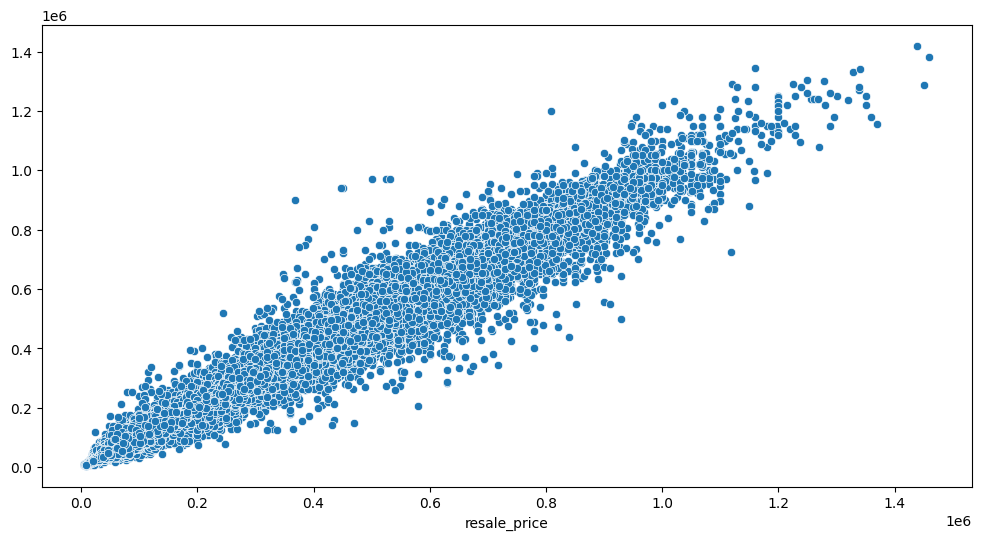

In [196]:
#Scatter plot of predicted vs actual
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

In [51]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, max_depth=10)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 2178775439.9634304
R2 Score: 0.9221146807501344
Mean Absolute Error: 32203.417149691806


<Axes: xlabel='resale_price'>

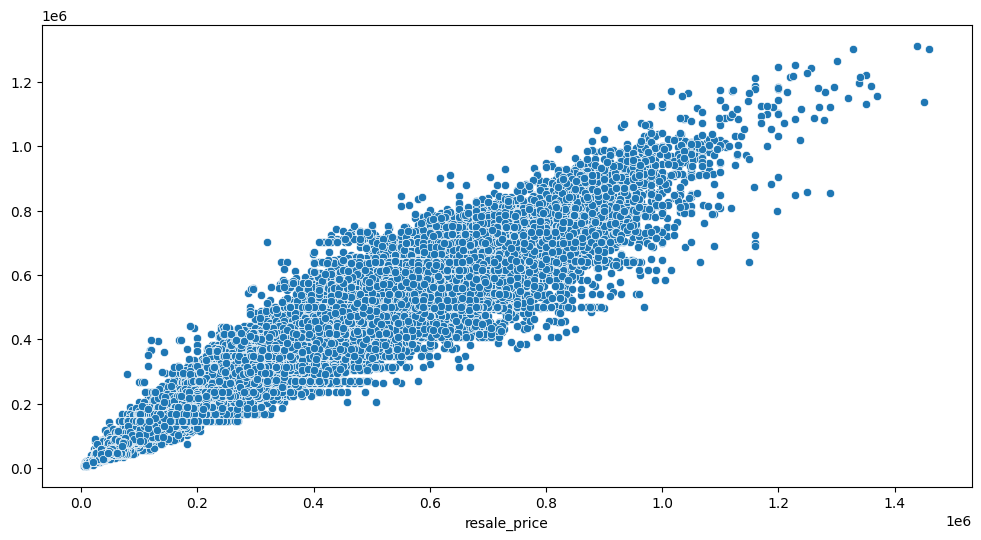

In [52]:
#Scatter plot of predicted vs actual
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

In [198]:
#save the model
#pickle.dump(rf, open('rf.pkl', 'wb'))

In [53]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)

# Predict the target variable using the test data
y_pred = lr.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

Mean Squared Error: 6475518771.0955715
Mean Absolute Error: 60067.746082889185
R2 Score: 0.7685177473802709


<Axes: xlabel='resale_price'>

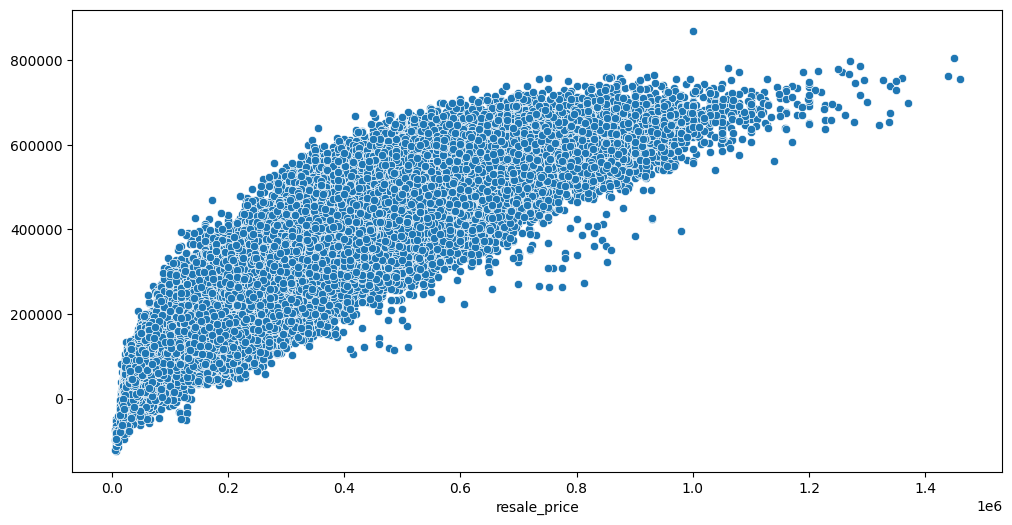

In [54]:
#Scatter plot of predicted vs actual
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

In [200]:
#Save the model
import pickle

#pickle.dump(lr, open('lr.pkl', 'wb'))

In the end after running all the models, we can see that Decision Tree Regressor is the best model for this project.
* As it has the highest R2 score and lowest mean squared error
* It is computationally efficient

In [201]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,0,2,170,17,4,69.0,9,1986,147000.0,0,2000
1,1,0,2,174,17,2,61.0,9,1986,144000.0,0,2000
2,1,0,2,216,13,4,73.0,21,1976,159000.0,0,2000
3,1,0,2,215,13,4,73.0,21,1976,167000.0,0,2000
4,1,0,2,218,13,4,67.0,21,1976,163000.0,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
287191,12,26,5,611,572,5,142.0,3,1987,456000.0,0,1999
287192,12,26,5,324,561,0,142.0,3,1988,408000.0,0,1999
287193,12,26,5,392,558,4,146.0,11,1988,469000.0,0,1999
287194,12,26,5,356,563,2,146.0,11,1988,440000.0,0,1999


In [202]:
#month town flat_type block street_name	storey_range floor_area_sqm	flat_model lease_commence_date year
#1	    0	   2	  170	    17	          4	           69.0	         9	        20	           2000

Checking the output by giving an example

In [203]:
#Testing the model
import numpy as np

# Sample data
ns = np.array([[1, 'ANG MO KIO', '2 ROOM', 309, 'ANG MO KIO AVE 1', '10 TO 12', 44, 'Improved', 1977, 2017]])

#columns to encode
en1 = le1.transform(ns[:, [1]])
en2 = le2.transform(ns[:, [2]])
en3 = le3.transform(ns[:, [4]])
en4 = le4.transform(ns[:, [5]])
en5 = le5.transform(ns[:, [7]])

# Convert 1D arrays to 2D arrays
en1 = en1[:, np.newaxis]
en2 = en2[:, np.newaxis]
en3 = en3[:, np.newaxis]
en4 = en4[:, np.newaxis]
en5 = en5[:, np.newaxis]

ns = np.concatenate((ns[:, [0]], en1, en2, ns[:, [3]], en3, en4, ns[:, [6]], en5, ns[:, [8]], ns[:, [9]]), axis=1)

#predict the resale price with the model
resale = dt.predict(ns)
print(f'the resale price is :{resale}')

d:\New folder (2)\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\New folder (2)\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\New folder (2)\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\New folder (2)\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vect

the resale price is :[250000.]


In [207]:
#XGBoost Regressor
#from xgboost import XGBRegressor
#xgb = XGBRegressor()
#xgb.fit(x_train, y_train)
#y_pred = xgb.predict(x_test)
#from sklearn.metrics import r2_score, mean_squared_error
#print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
#print(f'R2 Score: {r2_score(y_test, y_pred)}')

In [208]:
#save the models
#pickle.dump(rf, open('rf.pkl', 'wb'))
#pickle.dump(xgb, open('xgb.pkl', 'wb'))
#pickle.dump(svr, open('svr.pkl', 'wb'))